# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. 

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [3]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("data/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [4]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Now that we're set up, let's learn about scaling & normalization.

# Scaling vs. Normalization: What's the difference?
____

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. 

The difference is that, in scaling, you're changing the *range* of your data while in normalization you're changing the *shape of the distribution* of your data. Let's talk a little more in-depth about each of these options. 

___

## **Scaling**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.  You want to scale data when you're using methods based on measures of how far apart data points, like [support vector machines, or SVM](https://en.wikipedia.org/wiki/Support_vector_machine) or [k-nearest neighbors, or KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). With these algorithms, a change of "1" in any numeric feature is given the same importance. 

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Scaled data')

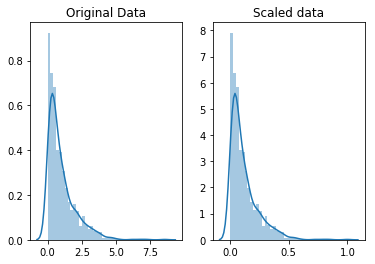

In [5]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the *shape* of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

___
## Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

> **[Normal distribution:](https://en.wikipedia.org/wiki/Normal_distribution)** Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're  using to normalize here is called the [Box-Cox Transformation](http://www.statisticshowto.com/box-cox-transformation/). Let's take a quick peek at what normalizing some data looks like:

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalized data')

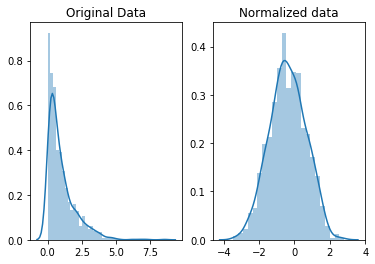

In [6]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Notice that the *shape* of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve"). 

___
## Your turn!

For the following example, decide whether scaling or normalization makes more sense. 

* You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week.  You notice that your measurements for how much time students spend studying isn't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?
* You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?

# Practice scaling
___

To practice scaling and normalization, we're going to be using a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Scaled data')

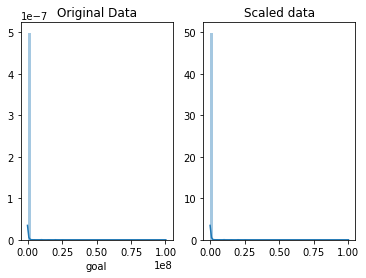

In [8]:
# select the goal column
goal = kickstarters_2017.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

You can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)

# Practice normalization
___

Ok, now let's try practicing normalization. We're going to normalize the amount of money pledged to each campaign.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalized data')

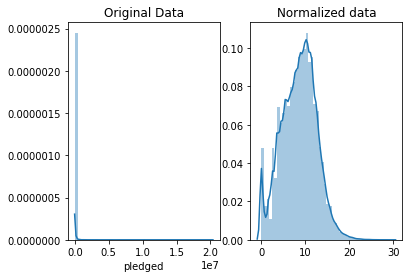

In [10]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to normal!